In [1]:
import matplotlib.pyplot as plt
import uproot
import numpy as np
import pandas as pd
import matplotlib as mpl

import sys
sys.path.insert(1, '/afs/desy.de/user/a/axelheim/private/MC_studies/Dstlnu_Bt_generic/util_funcs/')
from pandas_colFuncs import B_ID, whichBisSig, D0_decay_type, whichBisSig_NAHS

In [2]:
nfs_path = "/nfs/dust/belle2/user/axelheim/MC_studies/Dstlnu_Bt_generic/appliedNNdata/minimalDstcounter/"

In [3]:
evt_counter_file = uproot.open(nfs_path + "evt_counter.root:variables;1")
df_evt_counter = evt_counter_file.arrays(library="pd")

In [4]:
evt_counter_file_afterCut = uproot.open(nfs_path + "evt_counter_afterDstlnu_cut.root:variables;1")
df_evt_counter_afterCut = evt_counter_file_afterCut.arrays(library="pd")

In [5]:
imputelist = [["abs_genUp4S_PDG_0_0",0],["abs_genUp4S_PDG_0_1",0],["abs_genUp4S_PDG_0_2",0],
              ["abs_genUp4S_PDG_1_0",0],["abs_genUp4S_PDG_1_1",0],["abs_genUp4S_PDG_1_2",0]
              ]
for impute in imputelist:
    column_name = impute[0]
    impute_val = impute[1]

    print(df_evt_counter[df_evt_counter[column_name].isna() == True].shape[0])
    mask = df_evt_counter[column_name].isna() == 1
    df_evt_counter.loc[mask, column_name] = impute_val
    print(df_evt_counter[df_evt_counter[column_name].isna() == True].shape[0])

0
0
0
0
27749
0
0
0
0
0
27894
0


In [6]:
for impute in imputelist:
    column_name = impute[0]
    impute_val = impute[1]

    print(df_evt_counter_afterCut[df_evt_counter_afterCut[column_name].isna() == True].shape[0])
    mask = df_evt_counter_afterCut[column_name].isna() == 1
    df_evt_counter_afterCut.loc[mask, column_name] = impute_val
    print(df_evt_counter_afterCut[df_evt_counter_afterCut[column_name].isna() == True].shape[0])

0
0
0
0
2767
0
0
0
0
0
2743
0


In [7]:
#[[[abs_genUp4S_PDG_0_0 == 413.0] and 
#[[abs_genUp4S_PDG_0_1 == 11.0] or [abs_genUp4S_PDG_0_1 == 13.0]] and 
#[[abs_genUp4S_PDG_0_2 == 12.0] or [abs_genUp4S_PDG_0_2 == 14.0]]] or 

#[[abs_genUp4S_PDG_1_0 == 413.0] and 
#[[abs_genUp4S_PDG_1_1 == 11.0] or [abs_genUp4S_PDG_1_1 == 13.0]] and 
#[[abs_genUp4S_PDG_1_2 == 12.0] or [abs_genUp4S_PDG_1_2 == 14.0]]]]''', path)

In [8]:
def isDstlnu(s):
    isDstlnu = 0

    abs_genUp4S_PDG_0_0 = int(s["abs_genUp4S_PDG_0_0"])
    abs_genUp4S_PDG_0_1 = int(s["abs_genUp4S_PDG_0_1"])
    abs_genUp4S_PDG_0_2 = int(s["abs_genUp4S_PDG_0_2"])
                              
    abs_genUp4S_PDG_1_0 = int(s["abs_genUp4S_PDG_1_0"])
    abs_genUp4S_PDG_1_1 = int(s["abs_genUp4S_PDG_1_1"])
    abs_genUp4S_PDG_1_2 = int(s["abs_genUp4S_PDG_1_2"])
    
    if abs_genUp4S_PDG_0_0 == 413:
        if abs_genUp4S_PDG_0_1 == 11 or abs_genUp4S_PDG_0_1 == 13:
            if abs_genUp4S_PDG_0_2 == 12 or abs_genUp4S_PDG_0_2 == 14:              
                isDstlnu = 1
                                  
    if abs_genUp4S_PDG_1_0 == 413:
        if abs_genUp4S_PDG_1_1 == 11 or abs_genUp4S_PDG_1_1 == 13:
            if abs_genUp4S_PDG_1_2 == 12 or abs_genUp4S_PDG_1_2 == 14:              
                isDstlnu = 1        
        
    return isDstlnu

df_evt_counter['isDstlnu'] = df_evt_counter.apply(isDstlnu, axis=1)

In [9]:
def whichB_isDstlnu(s):
    whichB_isDstlnu = -1
    if s["abs_genUp4S_PDG_0_0"] == 0:
        return -1

    abs_genUp4S_PDG_0_0 = int(s["abs_genUp4S_PDG_0_0"])
    abs_genUp4S_PDG_0_1 = int(s["abs_genUp4S_PDG_0_1"])
    abs_genUp4S_PDG_0_2 = int(s["abs_genUp4S_PDG_0_2"])
                              
    abs_genUp4S_PDG_1_0 = int(s["abs_genUp4S_PDG_1_0"])
    abs_genUp4S_PDG_1_1 = int(s["abs_genUp4S_PDG_1_1"])
    abs_genUp4S_PDG_1_2 = int(s["abs_genUp4S_PDG_1_2"])
    
    if abs_genUp4S_PDG_0_0 == 413:
        if abs_genUp4S_PDG_0_1 == 11 or abs_genUp4S_PDG_0_1 == 13:
            if abs_genUp4S_PDG_0_2 == 12 or abs_genUp4S_PDG_0_2 == 14:              
                whichB_isDstlnu = 0
                                  
    if abs_genUp4S_PDG_1_0 == 413:
        if abs_genUp4S_PDG_1_1 == 11 or abs_genUp4S_PDG_1_1 == 13:
            if abs_genUp4S_PDG_1_2 == 12 or abs_genUp4S_PDG_1_2 == 14:
                if whichB_isDstlnu == 0:
                    whichB_isDstlnu = 2
                else:
                    whichB_isDstlnu = 1        
        
    return whichB_isDstlnu

df_evt_counter['whichB_isDstlnu'] = df_evt_counter.apply(whichB_isDstlnu, axis=1)

In [10]:
df_evt_counter['isDstlnu'].mean()

0.19332804232804232

In [11]:
df_evt_counter['genUp4S_PDG_1'].value_counts()

 511.0    94522
-511.0    94478
Name: genUp4S_PDG_1, dtype: int64

In [12]:
df_evt_counter[df_evt_counter['isDstlnu'] == 1].shape[0]

36539

In [13]:
df_evt_counter.shape[0]

189000

In [14]:
df_evt_counter_afterCut.shape[0]

36539

In [15]:
df_evt_counter_afterCut['isDstlnu'] = df_evt_counter_afterCut.apply(isDstlnu, axis=1)

In [16]:
df_evt_counter_afterCut['isDstlnu'].mean()

1.0

## look at D* l nu subset

In [17]:
Dstlnu_df = df_evt_counter[df_evt_counter['isDstlnu'] == 1]

In [18]:
Dstlnu_df['whichB_isDstlnu'].value_counts()

0    17270
1    17256
2     2013
Name: whichB_isDstlnu, dtype: int64

In [19]:
zerothB = Dstlnu_df[Dstlnu_df['whichB_isDstlnu'] != 1]

In [20]:
zerothB["abs_genUp4S_PDG_0_3"].value_counts()

22.0    5667
Name: abs_genUp4S_PDG_0_3, dtype: int64

In [21]:
zerothB["genUp4S_PDG_0_0_0"].value_counts()

 421.0    6604
-421.0    6575
-411.0    3126
 411.0    2978
Name: genUp4S_PDG_0_0_0, dtype: int64

In [22]:
firstB = Dstlnu_df[Dstlnu_df['whichB_isDstlnu'] != 0]

In [23]:
firstB["abs_genUp4S_PDG_1_3"].value_counts()

22.0    5633
Name: abs_genUp4S_PDG_1_3, dtype: int64

## look at files sizes 12thRun Ups4S files

In [23]:
raw=[[1.0,111],
[1.0,191],
[1.0,201],
[1.0,269],
[1.0,287],
[1.0,467],
[1.0,519],
[1.0,528],
[1.0,533],
[1.2,114],
[1.2,115],
[1.2,116],
[1.2,142],
[1.2,144],
[1.2,14],
[1.2,16],
[1.2,192],
[1.2,194],
[1.2,214],
[1.2,246],
[1.2,27],
[1.2,283],
[1.2,311],
[1.2,335],
[1.2,341],
[1.2,342],
[1.2,382],
[1.2,3],
[1.2,443],
[1.2,471],
[1.2,476],
[1.2,537],
[1.2,65],
[1.3,108],
[1.3,109],
[1.3,118],
[1.3,146],
[1.3,162],
[1.3,166],
[1.3,170],
[1.3,188],
[1.3,197],
[1.3,206],
[1.3,211],
[1.3,21],
[1.3,224],
[1.3,230],
[1.3,247],
[1.3,251],
[1.3,259],
[1.3,260],
[1.3,262],
[1.3,264],
[1.3,268],
[1.3,270],
[1.3,274],
[1.3,275],
[1.3,281],
[1.3,28],
[1.3,298],
[1.3,319],
[1.3,325],
[1.3,334],
[1.3,340],
[1.3,351],
[1.3,367],
[1.3,372],
[1.3,375],
[1.3,378],
[1.3,39],
[1.3,40],
[1.3,414],
[1.3,418],
[1.3,419],
[1.3,423],
[1.3,433],
[1.3,435],
[1.3,445],
[1.3,448],
[1.3,457],
[1.3,490],
[1.3,491],
[1.3,495],
[1.3,49],
[1.3,4],
[1.3,502],
[1.3,517],
[1.3,532],
[1.3,57],
[1.3,68],
[1.3,69],
[1.3,6],
[1.3,89],
[1.3,9],
[1.4,100],
[1.4,103],
[1.4,106],
[1.4,107],
[1.4,112],
[1.4,127],
[1.4,128],
[1.4,130],
[1.4,13],
[1.4,140],
[1.4,141],
[1.4,148],
[1.4,151],
[1.4,157],
[1.4,159],
[1.4,15],
[1.4,163],
[1.4,167],
[1.4,168],
[1.4,173],
[1.4,176],
[1.4,177],
[1.4,178],
[1.4,183],
[1.4,185],
[1.4,196],
[1.4,19],
[1.4,215],
[1.4,216],
[1.4,225],
[1.4,22],
[1.4,234],
[1.4,237],
[1.4,245],
[1.4,250],
[1.4,25],
[1.4,265],
[1.4,266],
[1.4,279],
[1.4,286],
[1.4,290],
[1.4,301],
[1.4,304],
[1.4,307],
[1.4,309],
[1.4,30],
[1.4,310],
[1.4,314],
[1.4,317],
[1.4,321],
[1.4,322],
[1.4,332],
[1.4,333],
[1.4,345],
[1.4,348],
[1.4,362],
[1.4,364],
[1.4,37],
[1.4,381],
[1.4,386],
[1.4,38],
[1.4,396],
[1.4,399],
[1.4,400],
[1.4,404],
[1.4,409],
[1.4,412],
[1.4,417],
[1.4,428],
[1.4,431],
[1.4,432],
[1.4,439],
[1.4,43],
[1.4,444],
[1.4,447],
[1.4,451],
[1.4,454],
[1.4,456],
[1.4,466],
[1.4,470],
[1.4,472],
[1.4,473],
[1.4,474],
[1.4,475],
[1.4,480],
[1.4,481],
[1.4,485],
[1.4,488],
[1.4,489],
[1.4,498],
[1.4,499],
[1.4,506],
[1.4,525],
[1.4,52],
[1.4,56],
[1.4,5],
[1.4,61],
[1.4,64],
[1.4,67],
[1.4,71],
[1.4,73],
[1.4,74],
[1.4,80],
[1.4,82],
[1.4,88],
[1.4,90],
[1.4,92],
[1.5,113],
[1.5,120],
[1.5,133],
[1.5,138],
[1.5,139],
[1.5,143],
[1.5,145],
[1.5,149],
[1.5,150],
[1.5,154],
[1.5,155],
[1.5,158],
[1.5,160],
[1.5,164],
[1.5,169],
[1.5,174],
[1.5,17],
[1.5,180],
[1.5,186],
[1.5,187],
[1.5,190],
[1.5,200],
[1.5,203],
[1.5,205],
[1.5,208],
[1.5,222],
[1.5,231],
[1.5,235],
[1.5,23],
[1.5,252],
[1.5,253],
[1.5,263],
[1.5,267],
[1.5,271],
[1.5,285],
[1.5,288],
[1.5,291],
[1.5,292],
[1.5,294],
[1.5,297],
[1.5,300],
[1.5,305],
[1.5,306],
[1.5,308],
[1.5,31],
[1.5,326],
[1.5,329],
[1.5,331],
[1.5,338],
[1.5,346],
[1.5,350],
[1.5,352],
[1.5,355],
[1.5,356],
[1.5,361],
[1.5,363],
[1.5,365],
[1.5,369],
[1.5,36],
[1.5,374],
[1.5,377],
[1.5,379],
[1.5,380],
[1.5,383],
[1.5,389],
[1.5,390],
[1.5,393],
[1.5,397],
[1.5,401],
[1.5,405],
[1.5,408],
[1.5,411],
[1.5,413],
[1.5,415],
[1.5,416],
[1.5,420],
[1.5,424],
[1.5,425],
[1.5,426],
[1.5,429],
[1.5,42],
[1.5,436],
[1.5,449],
[1.5,450],
[1.5,452],
[1.5,45],
[1.5,465],
[1.5,47],
[1.5,494],
[1.5,497],
[1.5,501],
[1.5,504],
[1.5,515],
[1.5,51],
[1.5,522],
[1.5,526],
[1.5,529],
[1.5,530],
[1.5,534],
[1.5,535],
[1.5,60],
[1.5,62],
[1.5,72],
[1.5,75],
[1.5,78],
[1.5,85],
[1.5,8],
[1.5,91],
[1.5,93],
[1.5,94],
[1.5,96],
[1.7,102],
[1.7,104],
[1.7,110],
[1.7,117],
[1.7,119],
[1.7,124],
[1.7,126],
[1.7,129],
[1.7,12],
[1.7,131],
[1.7,134],
[1.7,136],
[1.7,153],
[1.7,156],
[1.7,161],
[1.7,172],
[1.7,182],
[1.7,184],
[1.7,189],
[1.7,193],
[1.7,195],
[1.7,1],
[1.7,204],
[1.7,212],
[1.7,218],
[1.7,223],
[1.7,228],
[1.7,236],
[1.7,240],
[1.7,242],
[1.7,248],
[1.7,249],
[1.7,24],
[1.7,261],
[1.7,273],
[1.7,280],
[1.7,295],
[1.7,296],
[1.7,303],
[1.7,313],
[1.7,315],
[1.7,316],
[1.7,318],
[1.7,323],
[1.7,327],
[1.7,32],
[1.7,330],
[1.7,336],
[1.7,33],
[1.7,344],
[1.7,349],
[1.7,353],
[1.7,354],
[1.7,358],
[1.7,359],
[1.7,35],
[1.7,368],
[1.7,384],
[1.7,391],
[1.7,392],
[1.7,395],
[1.7,402],
[1.7,410],
[1.7,427],
[1.7,430],
[1.7,434],
[1.7,440],
[1.7,441],
[1.7,442],
[1.7,446],
[1.7,453],
[1.7,458],
[1.7,459],
[1.7,460],
[1.7,464],
[1.7,48],
[1.7,496],
[1.7,503],
[1.7,505],
[1.7,509],
[1.7,50],
[1.7,510],
[1.7,512],
[1.7,513],
[1.7,514],
[1.7,518],
[1.7,531],
[1.7,83],
[1.7,86],
[1.7,95],
[1.7,98],
[1.8,0],
[1.8,11],
[1.8,135],
[1.8,165],
[1.8,175],
[1.8,18],
[1.8,198],
[1.8,202],
[1.8,213],
[1.8,220],
[1.8,221],
[1.8,226],
[1.8,227],
[1.8,229],
[1.8,232],
[1.8,233],
[1.8,238],
[1.8,239],
[1.8,243],
[1.8,244],
[1.8,254],
[1.8,256],
[1.8,26],
[1.8,272],
[1.8,299],
[1.8,2],
[1.8,302],
[1.8,324],
[1.8,328],
[1.8,337],
[1.8,339],
[1.8,34],
[1.8,370],
[1.8,394],
[1.8,406],
[1.8,421],
[1.8,461],
[1.8,477],
[1.8,482],
[1.8,486],
[1.8,487],
[1.8,493],
[1.8,500],
[1.8,508],
[1.8,516],
[1.8,524],
[1.8,527],
[1.8,54],
[1.8,55],
[1.8,58],
[1.8,63],
[1.8,70],
[1.8,77],
[1.8,79],
[1.8,7],
[1.8,84],
[1.8,97],
[1.9,105],
[1.9,10],
[1.9,123],
[1.9,147],
[1.9,171],
[1.9,179],
[1.9,20],
[1.9,210],
[1.9,241],
[1.9,257],
[1.9,278],
[1.9,289],
[1.9,293],
[1.9,312],
[1.9,343],
[1.9,360],
[1.9,366],
[1.9,371],
[1.9,385],
[1.9,387],
[1.9,398],
[1.9,41],
[1.9,44],
[1.9,478],
[1.9,479],
[1.9,511],
[1.9,538],
[2.0,121],
[2.0,122],
[2.0,132],
[2.0,207],
[2.0,209],
[2.0,219],
[2.0,258],
[2.0,347],
[2.0,357],
[2.0,373],
[2.0,376],
[2.0,536],
[2.2,181],
[2.2,407],
[2.2,422],
[2.2,437],
[2.2,46],
[2.2,492],
[2.2,507],
[2.2,76],
[2.3,276],
[2.3,284],
[2.3,388],
[2.3,484],
[2.5,29],
[2.5,99],
[3.0,59],
[3.5,463],
[0.128,462],
[0.128,53],
[0.128,87],
[0.256,403],
[0.256,468],
[0.256,81],
[0.384,101],
[0.384,199],
[0.384,320],
[0.384,520],
[0.512,277],
[0.512,455],
[0.512,137],
[0.512,483],
[0.640,125],
[0.640,282],
[0.640,469],
[0.768,152],
[0.768,255],
[0.768,438],
[0.768,66],
[0.896,217],
[0.896,521],
[0.896,523]]

In [27]:
raw

[[1.0, 111],
 [1.0, 191],
 [1.0, 201],
 [1.0, 269],
 [1.0, 287],
 [1.0, 467],
 [1.0, 519],
 [1.0, 528],
 [1.0, 533],
 [1.2, 114],
 [1.2, 115],
 [1.2, 116],
 [1.2, 142],
 [1.2, 144],
 [1.2, 14],
 [1.2, 16],
 [1.2, 192],
 [1.2, 194],
 [1.2, 214],
 [1.2, 246],
 [1.2, 27],
 [1.2, 283],
 [1.2, 311],
 [1.2, 335],
 [1.2, 341],
 [1.2, 342],
 [1.2, 382],
 [1.2, 3],
 [1.2, 443],
 [1.2, 471],
 [1.2, 476],
 [1.2, 537],
 [1.2, 65],
 [1.3, 108],
 [1.3, 109],
 [1.3, 118],
 [1.3, 146],
 [1.3, 162],
 [1.3, 166],
 [1.3, 170],
 [1.3, 188],
 [1.3, 197],
 [1.3, 206],
 [1.3, 211],
 [1.3, 21],
 [1.3, 224],
 [1.3, 230],
 [1.3, 247],
 [1.3, 251],
 [1.3, 259],
 [1.3, 260],
 [1.3, 262],
 [1.3, 264],
 [1.3, 268],
 [1.3, 270],
 [1.3, 274],
 [1.3, 275],
 [1.3, 281],
 [1.3, 28],
 [1.3, 298],
 [1.3, 319],
 [1.3, 325],
 [1.3, 334],
 [1.3, 340],
 [1.3, 351],
 [1.3, 367],
 [1.3, 372],
 [1.3, 375],
 [1.3, 378],
 [1.3, 39],
 [1.3, 40],
 [1.3, 414],
 [1.3, 418],
 [1.3, 419],
 [1.3, 423],
 [1.3, 433],
 [1.3, 435],
 [1.3, 44

In [28]:
size=[a[0] for a in raw]
num=[a[1] for a in raw]

In [31]:
sizes = pd.DataFrame({'size': size,
                          'num' : num})

In [32]:
sizes.shape

(539, 2)

<AxesSubplot:>

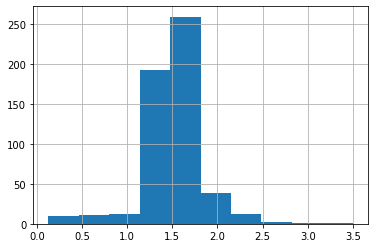

In [34]:
sizes["size"].hist()